#### Mini Project 4

# Predict Customer Clicked Ads Classification by Using Machine Learning

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Data
---

In [294]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.00,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.00,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.00,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.00,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.00,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [195]:
cats = ['Male', 'Timestamp','Clicked on Ad','city','province','category']
nums = ['Unnamed: 0','Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']

### Descriptive Statistics
---

In [196]:
df[nums].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.00,987.00,1000.00,987.00,989.00
mean,499.50,64.93,36.01,384864670.64,179.86
std,288.82,15.84,8.79,94079989.57,43.87
min,0.00,32.60,19.00,97975500.00,104.78
25%,249.75,51.27,29.00,328632990.00,138.71
50%,499.50,68.11,35.00,399068320.00,182.65
75%,749.25,78.46,42.00,458355450.00,218.79
max,999.00,91.43,61.00,556393600.00,267.01


In [197]:
df[cats].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


## **EDA**

### Univariate Analysis
---

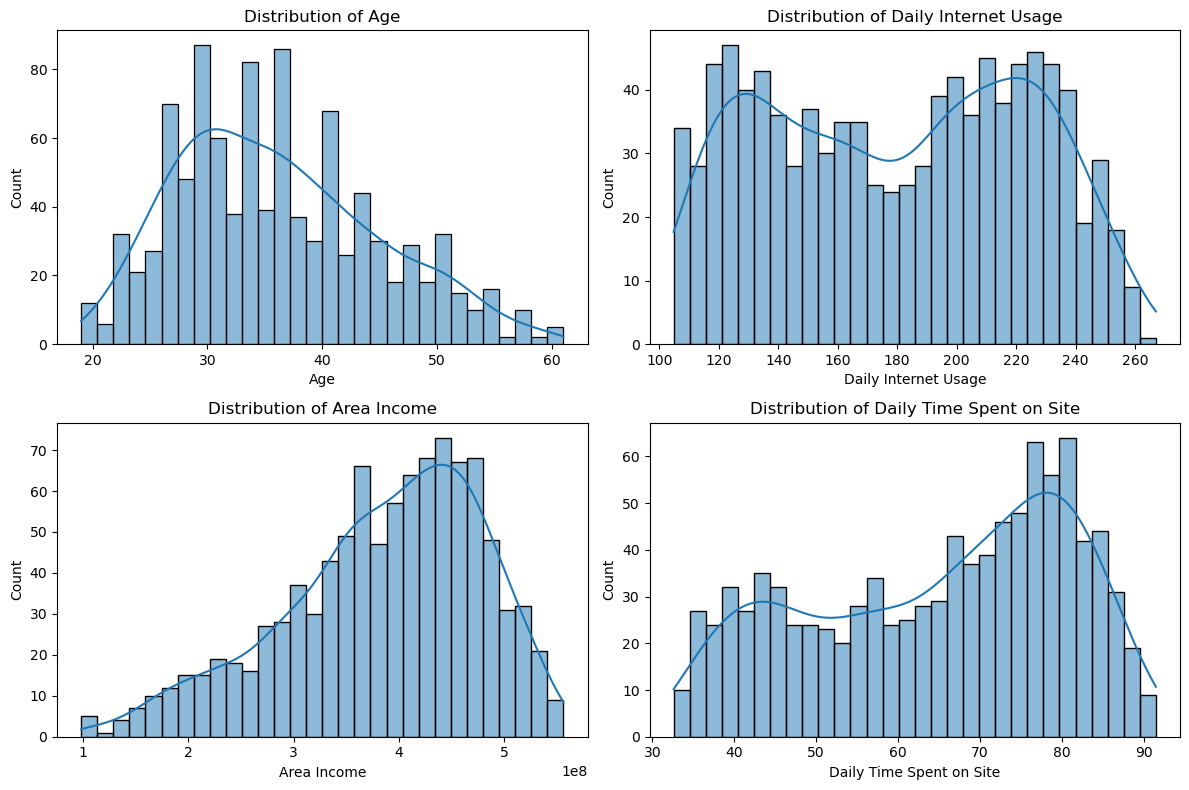

In [34]:
# Definisikan kolom yang akan dilihat
univariate_columns = ['Age', 'Daily Internet Usage', 'Area Income', 'Daily Time Spent on Site']

# Histplot
plt.figure(figsize=(12, 8))
for i, column in enumerate(univariate_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

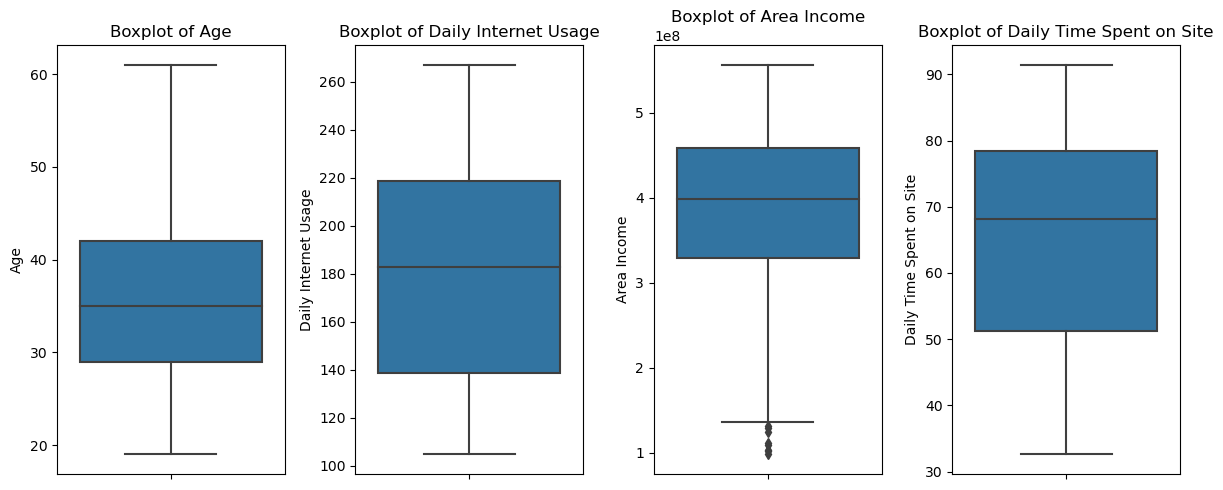

In [31]:
# Boxplot
plt.figure(figsize=(12, 5))
for i in range(len(univariate_columns)):
    plt.subplot(1, len(univariate_columns), i+1)
    sns.boxplot(y=df[univariate_columns[i]], orient='v')
    plt.title(f'Boxplot of {univariate_columns[i]}')
    plt.tight_layout()

plt.show()

- Daily Internet Usage memiliki distribusi yang hampir seragam.
- Area Income memiliki distribusi tidak normal dan condong ke kiri (left skew), menunjukkan adanya outlier.
- Age memiliki distribusi yang agak condong ke kanan.
- Daily Time Spent on Site memiliki distribusi yang cenderung seragam.

### Bivariate Analysis
---

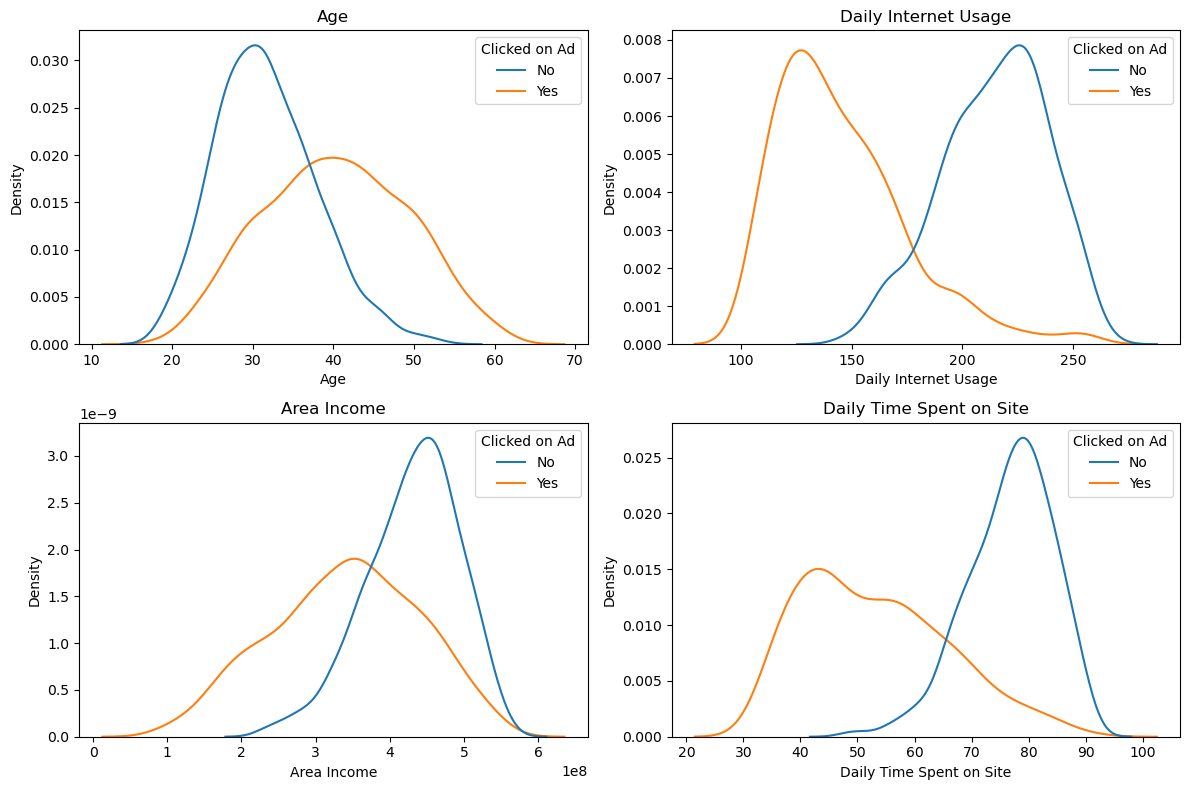

In [35]:
# Kdeplot
plt.figure(figsize = (12,8))
for i in range(len(univariate_columns)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=univariate_columns[i], hue='Clicked on Ad', data=df)
    plt.xlabel(univariate_columns[i], fontsize=10)
    plt.title(f'{univariate_columns[i]}')
    plt.tight_layout()

Kesimpulan:
- Pengguna berumur sekitar 40 tahun paling banyak mengklik iklan, sedangkan pengguna berumur sekitar 30 tahun paling banyak tidak mengklik iklan.
- Pengguna yang tidak terlalu lama mengunjungi situs cenderung lebih sering mengklik iklan dari pada pengguna yang mengunjungi situs dalam waktu lama.
- Pengguna dengan area income rendah cenderung lebih sering mengklik iklan.
- Jumlah pengguna yang tidak terlalu banyak menggunakan internet lebih banyak yang mengklik iklan.

### Multivariate Analysis
---

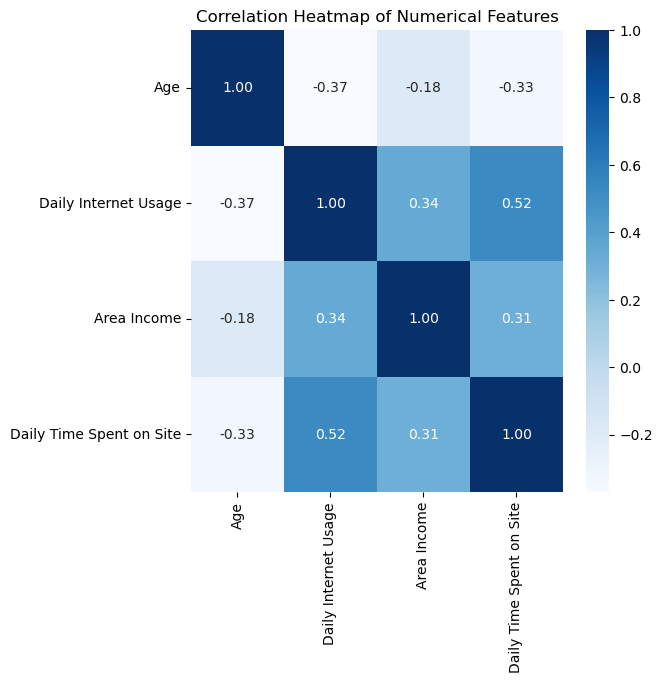

In [42]:
# Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(df[univariate_columns].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- Fitur Age tidak memiliki korelasi yang tinggi dengan fitur-fitur numerikal yang lainnya.

## **Data Preprocessing**

### Data Cleaning
---

#### Missing Values

In [295]:
df1 = df.copy()

In [296]:
df1.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [297]:
df1['Daily Time Spent on Site'].fillna(df1['Daily Time Spent on Site'].mean(), inplace=True)
df1['Area Income'].fillna(df1['Area Income'].mean(), inplace=True)
df1['Daily Internet Usage'].fillna(df1['Daily Internet Usage'].mean(), inplace=True)
df1['Male'].fillna(df1['Male'].mode()[0], inplace=True)

In [298]:
df1.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

#### Duplicated Values

In [299]:
df1.duplicated().sum()

0

### Extract Date
---

In [300]:
# Mengubah data type kolom menjadi datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# Extract waktu
df1['Year'] = df1['Timestamp'].dt.year
df1['Month'] = df1['Timestamp'].dt.month
df1['Week'] = df1['Timestamp'].dt.isocalendar().week
df1['Day'] = df1['Timestamp'].dt.day

In [301]:
df1.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
0,0,68.95,35,432837300.00,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,1,80.23,31,479092950.00,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,2,69.47,26,418501580.00,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,3,74.15,29,383643260.00,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,4,68.37,35,517229930.00,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3


### Feature Encoding
---

#### Label Encoding

In [302]:
# Clicked on Ads, yes = 1 dan no = 0
df1['Clicked on Ad'] = df1['Clicked on Ad'].map({'Yes': 1, 'No': 0})

# Male, laki-laki = 1 dan perempuan = 0
df1['Male'] = df1['Male'].map({'Laki-Laki': 1, 'Perempuan': 0})

#### One-hot Encoding

In [303]:
check_columns = df1[['city','province','category']]
check_columns.describe()

,city,province,category
count,1000,1000,1000
unique,30,16,10
top,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,64,253,112


In [304]:
dfe = pd.get_dummies(df1, columns = ['category'])
dfe.drop('category_Bank', axis=1, inplace=True)

In [305]:
# Mengubah isi True dan False menjadi 0 dan 1
for col in dfe.columns:
    if dfe[col].dtype == 'bool':
        dfe[col] = dfe[col].astype(int)

In [306]:
dfe.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,...,Day,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.00,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,...,27,0,0,0,0,1,0,0,0,0
1,1,80.23,31,479092950.00,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,...,4,0,0,0,1,0,0,0,0,0
2,2,69.47,26,418501580.00,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,...,13,1,0,0,0,0,0,0,0,0
3,3,74.15,29,383643260.00,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,...,10,0,0,0,0,0,0,1,0,0
4,4,68.37,35,517229930.00,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,...,3,0,0,1,0,0,0,0,0,0


### Feature Selection
---

In [307]:
dfe1 = dfe.drop(columns=['Unnamed: 0', 'Timestamp', 'city', 'province'])

In [308]:
dfe1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Year,Month,Week,Day,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.00,256.09,0,0,2016,3,12,27,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.00,193.77,1,0,2016,4,14,4,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.00,236.50,0,0,2016,3,10,13,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.00,245.89,1,0,2016,1,1,10,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.00,225.58,0,0,2016,6,22,3,0,0,1,0,0,0,0,0,0


- Unnamed: 0 dihapus karena merupakan data unique yang berisikan ID pelanggan.
- city dan province dihapus karena merupakan data kategorikal.
- Timestamp dihapus karena merupakan data tanggal dan sudah di extract sebelumnya.

### Split Data
---

In [309]:
X = dfe1.drop(columns=['Clicked on Ad'])
y = dfe1['Clicked on Ad']

#Split data menjadi Train and Test
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.2, random_state=42)

In [310]:
ytrain.value_counts()

Clicked on Ad
0    108
1     92
Name: count, dtype: int64

## **Modeling**

Analisis modeling akan dilakukan menggunakan LazyPredict untuk bisa melihat mana model yang terbaik tanpa mencoba satu persatu.

### Tanpa Standarisasi
---

In [312]:
from lazypredict.Supervised import LazyClassifier

# Experiment 1: Without normalization
clf = LazyClassifier(random_state=42)
models, predictions = clf.fit(Xtrain, Xtest, ytrain, ytest)

print(models)

100%|██████████| 29/29 [00:02<00:00,  9.75it/s]

[LightGBM] [Info] Number of positive: 92, number of negative: 108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460000 -> initscore=-0.160343
[LightGBM] [Info] Start training from score -0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Model yang terbaik adalah ExtraTreesClassifier

### Dengan Standarisasi

In [313]:
# Experiment 2: With normalization
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

clf_scaled = LazyClassifier(random_state=42)
models_scaled, predictions_scaled = clf_scaled.fit(Xtrain_scaled, Xtest_scaled, ytrain, ytest)

print(models_scaled)

100%|██████████| 29/29 [00:02<00:00, 11.88it/s]

[LightGBM] [Info] Number of positive: 92, number of negative: 108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460000 -> initscore=-0.160343
[LightGBM] [Info] Start training from score -0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Model yang terbaik tetaplah ExtraTreesClassifier walaupun setelah dilakukan standarisasi pada data.

#### Hyperparameter Tuning

In [315]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = ExtraTreesClassifier()

# Mendefinisikan parameter distribusi
param_dist = {
    'n_estimators': randint(100, 300), # Jumlah pohon
    'max_features': ['auto', 'sqrt', 'log2'], # Jumlah fitur yang dipertimbangkan untuk split
    'max_depth': [None, 10, 20, 30], # Kedalaman maksimum pohon
    'min_samples_split': randint(2, 10), # Jumlah minimum sampel untuk membagi internal node
    'min_samples_leaf': randint(1, 5) # Jumlah minimum sampel di daun
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(Xtrain, ytrain)

# Tampilkan parameter terbaik
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 107}


### Confusion Matrix
---

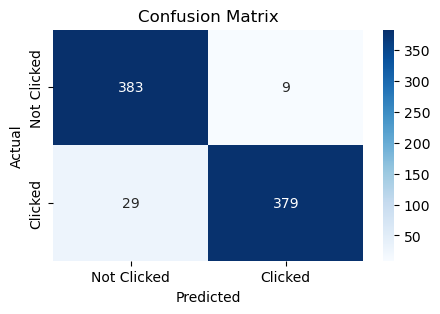

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       392
           1       0.98      0.93      0.95       408

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



In [321]:
from sklearn.metrics import confusion_matrix, classification_report

# Ambil model terbaik dari RandomizedSearchCV
best_model = random_search.best_estimator_

# Prediksi pada data uji
y_pred = best_model.predict(Xtest)

# Hitung confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Clicked', 'Clicked'], 
            yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan classification report
print(classification_report(ytest, y_pred))


**Kesimpulan:**
- Model ExtraTreesClassifier menunjukkan kinerja yang sangat baik dengan akurasi keseluruhan sebesar 95%.
- Precision, recall, dan F1-score yang tinggi untuk kedua kelas menunjukkan bahwa model seimbang dalam mendeteksi kedua kelas tanpa bias yang signifikan terhadap salah satu kelas.
- Angka recall pada kelas 0 (tidak klik iklan) yang sangat tinggi (0.98) menunjukkan bahwa hampir semua instance dari kelas 0 terdeteksi dengan benar.
- Angka precision pada kelas 1 (klik iklan) yang sangat tinggi (0.98) menunjukkan bahwa hampir semua prediksi untuk kelas 1 adalah benar.

### Feature Importance
---

In [320]:
# Ambil fitur penting dari model terbaik
importances = best_model.feature_importances_

# Buat DataFrame untuk fitur penting
features = Xtrain.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tampilkan fitur teratas
print(importance_df)

                     Feature  Importance
3       Daily Internet Usage        0.40
0   Daily Time Spent on Site        0.27
1                        Age        0.14
2                Area Income        0.10
6                      Month        0.01
4                       Male        0.01
7                       Week        0.01
8                        Day        0.01
15            category_House        0.01
17           category_Travel        0.01
10          category_Fashion        0.00
13        category_Furniture        0.00
9        category_Electronic        0.00
11          category_Finance        0.00
12             category_Food        0.00
16         category_Otomotif        0.00
14           category_Health        0.00
5                       Year        0.00


Features yang paling penting berdasarkan analisis model adalah:
- Daily Internet Usage
- Daily Time Spent on Site
- Age
- Area Income

## **Rekomendasi**

### Rekomendasi Bisnis
---

Berikut rekomendasi bisnis berdasarkan feature importance:

1. Daily Internet Usage:
    - Karena pengguna yang menghabiskan sedikit waktu di internet lebih mungkin untuk mengklik iklan, fokus pada iklan digital  melalui platform digital di mana pengguna cenderung tidak aktif.
    - Gunakan iklan retargeting untuk menjangkau kembali pengguna yang telah menunjukkan minat tetapi belum melakukan konversi.
<br> <br>
2. Daily Time Spent on Site:
    - Karena pengguna yang menghabiskan sedikit waktu di situs lebih mungkin mengklik iklan, fokus pada membuat konten di situs relevan dan menarik dan fast-paced untuk membuat pengguna lebih cepat mengklik iklan.
    - Menambahkan fitur seperti video, kuis, atau artikel interaktif untuk meningkatkan keterlibatan pengguna.
    - Pastikan situs mudah dinavigasi dan memberikan pengalaman pengguna yang baik.
<br> <br>
3. Age:
    - Usia mempengaruhi kemungkinan pelanggan untuk mengklik iklan, maka fokus pada menyesuaikan iklan berdasarkan kelompok usia untuk meningkatkan relevansi dan keterlibatan.
    - Membuat kampanye khusus yang menargetkan kelompok usia sekitar 40 tahun karena menunjukkan tingkat konversi yang lebih tinggi.
<br> <br>
4. Area Income:
    - Karena pendapatan berdasarkan area mempengaruhi perilaku pelanggan untuk mengklik iklan, maka fokus pada membuat kampanye iklan pada area dengan pendapatan lebih rendah.
    - Menyesuaikan konten iklan yang relevan dengan tingkat pendapatan pengguna di area tertentu untuk meningkatkan efektivitas.

### Simulasi tanpa Model Machine Learning
---

**Asumsi:**
- Jumlah pengguna: 10,000
- Biaya pemasaran per pengguna: Rp30,000
- Conversion rate (tanpa ML): 2%
- Revenue per conversion: Rp750,000
<br><br>

**Perhitungan:**
- Total Biaya (Cost): ( 10,000 x Rp30,000 = Rp300,000,000 )
- Total Konversi (Conversions): ( 10,000 x 0.02 = 200 )
- Total Pendapatan (Revenue): ( 200 x Rp750,000 = Rp150,000,000 )
- Profit: ( Rp150,000,000 - Rp300,000,000 = -Rp150,000,000 ) (Kerugian)

### Simulasi dengan Model Machine Learning
---

**Asumsi:**
- Jumlah pengguna: 10,000
- Biaya pemasaran per pengguna: Rp30,000
- Conversion rate (dengan ML): 5%
- Revenue per conversion: Rp750,000
<br><br>

**Perhitungan:**
- Total Biaya (Cost): ( 10,000 x Rp30,000 = Rp300,000,000 )
- Total Konversi (Conversions): ( 10,000 x 0.05 = 500 )
- Total Pendapatan (Revenue): ( 500 x Rp750,000 = Rp375,000,000 )
- Profit: ( Rp375,000,000 - Rp300,000,000 = Rp75,000,000 ) (Keuntungan)
<br><br>

**Ringkasan Simulasi Bisnis**

| Metode            | Total Biaya (Cost) | Total Pendapatan (Revenue) | Profit        |
|-------------------|--------------------|----------------------------|---------------|
| Tanpa ML          | Rp300,000,000      | Rp150,000,000              | -Rp150,000,000 |
| Dengan ML         | Rp300,000,000      | Rp375,000,000              | Rp75,000,000  |
<br><br>

**Kesimpulan:**
- Menggunakan model machine learning untuk target pemasaran meningkatkan conversion rate dari 2% menjadi 5%, yang secara signifikan meningkatkan revenue dan menghasilkan profit sebesar Rp75,000,000 dibandingkan dengan kerugian Rp150,000,000 tanpa menggunakan machine learning.